<div style="text-align: center;">
    <h1 style="font-size:26px;">ENTRENAMIENTO Y EVALUACIÓN CON DATOS BALANCEADOS OVERSAMPLING</h1>
</d>

In [49]:
# Importar librerías necesarias
import pandas as pd  # Para manejar los datos # type: ignore
import numpy as np  # Para operaciones numéricas# type: ignore
import pickle #Para guardar los modelos
import warnings #Elimina mensajes de alerta
warnings.simplefilter("ignore")

# Importamos las librerias para realizar el oversampling
from imblearn.over_sampling import RandomOverSampler # type: ignore

# Modelos supervisados de clasificación
from sklearn.linear_model import LogisticRegression  # Regresión logística # type: ignore
from sklearn.tree import DecisionTreeClassifier  # Árbol de decisión # type: ignore
from sklearn.ensemble import RandomForestClassifier  # Bosque aleatorio # type: ignore
from sklearn.ensemble import GradientBoostingClassifier # type: ignore

# Metricas de evaluacion de los modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Para evaluación # type: ignore

# Division de la Dataset
from sklearn.model_selection import train_test_split  # Para dividir el dataset en entrenamiento y prueba # type: ignore

# Visualización de datos
import matplotlib.pyplot as plt  # Para gráficos # type: ignore
import seaborn as sns  # Para gráficos más complejos # type: ignore

#### REALIZAMOS LA LECTURA DE NUESTROS DATOS PREPARADOS DE MAQUINARIA INDUSTRIAL

In [50]:
base = pd.read_csv('PREPARACION_DATOS.csv', delimiter=',')
base.head(5)

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure
0,0,0,1,298.1,308.6,1551,42.8,0,0
1,0,1,0,298.2,308.7,1408,46.3,3,0
2,0,1,0,298.1,308.5,1498,49.4,5,0
3,0,1,0,298.2,308.6,1433,39.5,7,0
4,0,1,0,298.2,308.7,1408,40.0,9,0


#### DIVISION DE LOS DATOS PARA EL ENTRENAMIENTO Y PRUEBA

##### SEPARACION DE LAS CARACTERISTICAS DE LA DATA "X" Y DE LA ETIQUETA "Y"

In [51]:
# Separar las características (X) y la columna objetivo (y)
X = base.drop(columns=['Machine Failure'])  # Eliminar la columna 'Machine Failure' de X
y = base['Machine Failure']  # Asignar 'Machine Failure' a y

In [52]:
# Definir las columnas y la lista para almacenar resultados
columnas = ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]',
            'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
            'Tool wear [min]']

# Aplicar Random Oversampling (oversampling) antes de dividir en conjunto de entrenamiento y prueba
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)  # Generar el conjunto balanceado

# Dividir los datos balanceados en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [53]:
# Ver la distribución de clases después del oversampling
print("\nDistribución de clases después del oversampling:")
print(y_resampled.value_counts())


Distribución de clases después del oversampling:
Machine Failure
0    9661
1    9661
Name: count, dtype: int64


#### REGRESION LOGISTICA

In [54]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de regresión logística
    log_reg = LogisticRegression(max_iter=1000)  # Aseguramos que converja adecuadamente
    log_reg.fit(X_train_subset, y_train)  # Entrenamos con los datos ya balanceados

    # Realizar las predicciones
    y_pred = log_reg.predict(X_test_subset)

    # Evaluar el modelo utilizando precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar el resultado de la precisión
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.5128
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.6031
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.6220
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.6197
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.8010
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.8176


In [55]:
# Evaluar la precisión en el conjunto de entrenamiento (conjunto balanceado)
train_accuracy1 = accuracy_score(y_train, log_reg.predict(X_train_subset))
print(f"Accuracy del entrenamiento: {train_accuracy1*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba balanceado
y_pred_resampled = log_reg.predict(X_test_subset)

# Evaluar la precisión en el conjunto de prueba balanceado
test_accuracy1 = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy del algoritmo: {test_accuracy1*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
class_report1 = classification_report(y_test, y_pred_resampled, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df1 = pd.DataFrame(class_report1).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df1 = report_df1.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df1

Accuracy del entrenamiento: 82.32 %
Accuracy del algoritmo: 81.76 %

Informe de clasificación:


,precision,recall,f1-score,support
0,0.810510,0.829369,0.819831,1934.0
1,0.825027,0.805800,0.815300,1931.0
macro avg,0.817768,0.817585,0.817566,3865.0
weighted avg,0.817763,0.817594,0.817567,3865.0


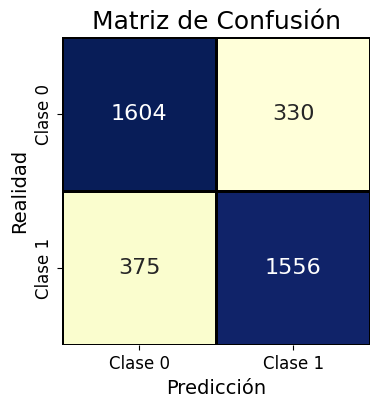

In [56]:
# Calcular la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred_resampled)  # Usar 'y_pred_resampled' para las predicciones del conjunto de prueba balanceado

# Crear el gráfico de la matriz de confusión con nuevo estilo
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'],
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [57]:
# Extraer valores de la matriz de confusión
TN = cm1[0, 0]  # Verdaderos Negativos
FP = cm1[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad = TN / (TN + FP)

# Imprimir el resultado
print(f"Especificidad: {especificidad:.2f}")

Especificidad: 0.83


### ARBOLES DE DESCISIONES

In [58]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Árbol de Decisión
    tree_model = DecisionTreeClassifier(random_state=42)  # Crear el modelo de árbol de decisión
    tree_model.fit(X_train_subset, y_train)  # Entrenamos con los datos ya balanceados

    # Realizar las predicciones
    y_pred = tree_model.predict(X_test_subset)

    # Evaluar el modelo utilizando precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar el resultado de la precisión
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.5128
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.7050
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.9239
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.9860
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.9891
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9951


In [59]:
# Evaluar la precisión en el conjunto de entrenamiento (balanceado)
train_accuracy2 = accuracy_score(y_train, tree_model.predict(X_train_subset))  # Usamos el conjunto de entrenamiento balanceado
print(f"Accuracy del entrenamiento: {train_accuracy2*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba (sin balancear)
y_pred_resampled = tree_model.predict(X_test)  # Aquí se usa X_test sin resampling

# Evaluar la precisión en el conjunto de prueba (sin balancear)
test_accuracy2 = accuracy_score(y_test, y_pred_resampled)  # Evaluamos con el conjunto de prueba sin balancear
print(f"Accuracy del algoritmo: {test_accuracy2*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
class_report2 = classification_report(y_test, y_pred_resampled, output_dict=True)  # Se evalúa el modelo en el conjunto de prueba

# Convertir el informe de clasificación en un DataFrame de pandas
report_df2 = pd.DataFrame(class_report2).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df2 = report_df2.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df2

Accuracy del entrenamiento: 100.00 %
Accuracy del algoritmo: 99.51 %

Informe de clasificación:


,precision,recall,f1-score,support
0,1.000000,0.990176,0.995064,1934.0
1,0.990256,1.000000,0.995104,1931.0
macro avg,0.995128,0.995088,0.995084,3865.0
weighted avg,0.995132,0.995084,0.995084,3865.0


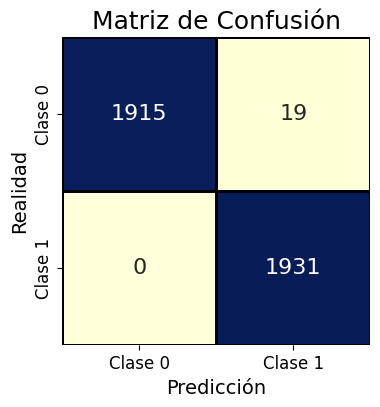

In [60]:
# Calcular la matriz de confusión
cm2 = confusion_matrix(y_test, y_pred_resampled)  # Usamos y_pred_resampled porque es el resultado final para el conjunto de prueba

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'], cbar=False, linewidths=1, linecolor='black', 
            square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [61]:
# Extraer valores de la matriz de confusión
TN2 = cm2[0, 0]  # Verdaderos Negativos
FP2 = cm2[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad2 = TN2 / (TN2 + FP2)

# Imprimir el resultado
print(f"Especificidad: {especificidad2:.2f}")

Especificidad: 0.99


### BOSQUES ALEATORIOS

In [62]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Bosques Aleatorios (Random Forest)
    rf_model = RandomForestClassifier(random_state=42)  # Crear el modelo de Random Forest
    rf_model.fit(X_train_subset, y_train)  # Entrenamos con los datos ya balanceados

    # Realizar las predicciones
    y_pred = rf_model.predict(X_test_subset)

    # Evaluar el modelo utilizando precisión
    accuracy = accuracy_score(y_test, y_pred)

    # Almacenar el resultado de la precisión
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado
    print(f'Columnas usadas: {col_modelo}, Precisión: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Precisión: 0.5128
Columnas usadas: ['Type_H', 'Type_L'], Precisión: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Precisión: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Precisión: 0.7030
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Precisión: 0.9250
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Precisión: 0.9940
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Precisión: 0.9956
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Precisión: 0.9974


In [63]:
# Evaluar la precisión en el conjunto de entrenamiento (balanceado)
train_accuracy3 = accuracy_score(y_train, rf_model.predict(X_train))  # Usamos X_train, y_train debido al oversampling
print(f"Accuracy del entrenamiento: {train_accuracy3*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)  # Aquí se usa X_test sin resampling

# Evaluar la precisión en el conjunto de prueba
test_accuracy3 = accuracy_score(y_test, y_pred)
print(f"Accuracy del algoritmo: {test_accuracy3*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
class_report3 = classification_report(y_test, y_pred, output_dict=True)  # Se evalúa el modelo en el conjunto de prueba

# Convertir el informe de clasificación en un DataFrame de pandas
report_df3 = pd.DataFrame(class_report3).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df3 = report_df3.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df3

Accuracy del entrenamiento: 100.00 %
Accuracy del algoritmo: 99.74 %

Informe de clasificación:


,precision,recall,f1-score,support
0,1.000000,0.994829,0.997408,1934.0
1,0.994848,1.000000,0.997417,1931.0
macro avg,0.997424,0.997415,0.997413,3865.0
weighted avg,0.997426,0.997413,0.997413,3865.0


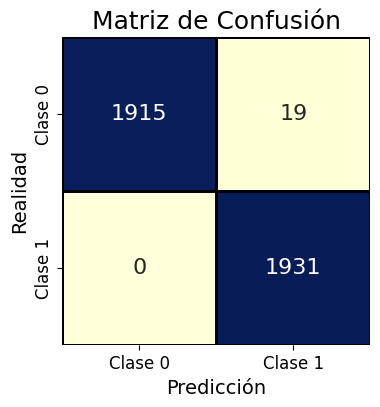

In [64]:
# Calcular la matriz de confusión
cm3 = confusion_matrix(y_test, y_pred_resampled)  # Usar 'y_pred_resampled' para las predicciones del conjunto de prueba balanceado

# Crear el gráfico de la matriz de confusión con nuevo estilo
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'],
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [65]:
# Extraer valores de la matriz de confusión
TN3 = cm3[0, 0]  # Verdaderos Negativos
FP3 = cm3[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad3 = TN3 / (TN3 + FP3)

# Imprimir el resultado
print(f"Especificidad: {especificidad3:.2f}")

Especificidad: 0.99


### GRADIENT BOOSTING MACHINES (GBM)

In [66]:
# Listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Gradient Boosting y entrenarlo
    gbm_model = GradientBoostingClassifier(random_state=42)  # Ajusta parámetros si es necesario
    gbm_model.fit(X_train_subset, y_train)

    # Realizar las predicciones en el conjunto de prueba
    y_pred = gbm_model.predict(X_test_subset)

    # Calcular y almacenar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado de la iteración
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.5128
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.5420
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.6887
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.7263
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.8652
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.8978
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9589


In [67]:
# Evaluar la precisión en el conjunto de entrenamiento
train_accuracy4= accuracy_score(y_train, gbm_model.predict(X_train_subset))
print(f"Accuracy del entrenamiento : {train_accuracy4*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred_gbm = gbm_model.predict(X_test_subset)

# Evaluar la precisión en el conjunto de prueba
test_accuracy4 = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy del algoritmo: {test_accuracy4*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación :")
class_report_gbm = classification_report(y_test, y_pred_gbm, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df4 = pd.DataFrame(class_report_gbm).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df4 = report_df4.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df4

Accuracy del entrenamiento : 95.93 %
Accuracy del algoritmo: 95.89 %

Informe de clasificación :


,precision,recall,f1-score,support
0,0.975362,0.941572,0.958169,1934.0
1,0.943443,0.976178,0.959532,1931.0
macro avg,0.959402,0.958875,0.958850,3865.0
weighted avg,0.959415,0.958862,0.958850,3865.0


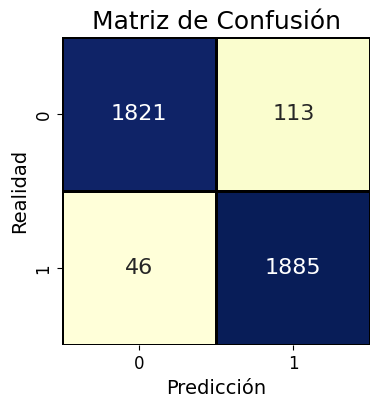

In [68]:
# Calcular la matriz de confusión con el Algoritmo de Gradient Boosting
cm4 = confusion_matrix(y_test, y_pred_gbm)  # Asegúrate de usar y_pred_gbm para el Algoritmo de Gradient Boosting

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='YlGnBu', xticklabels=gbm_model.classes_, yticklabels=gbm_model.classes_,
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [69]:
# Extraer valores de la matriz de confusión
TN4 = cm4[0, 0]  # Verdaderos Negativos
FP4 = cm4[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad4 = TN4 / (TN4 + FP4)

# Imprimir el resultado
print(f"Especificidad: {especificidad4:.2f}")

Especificidad: 0.94


In [70]:
# Crear el DataFrame usando los valores ya existentes
df = pd.DataFrame({
    'Algoritmo': ['Regresion Logistica', 'Arbol de descisiones', 'Bosques Aleatorios', 'Gradient Boosting Machines'],
    'Precisión Entrenamiento (%)': [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4],
    'Precisión Prueba (%)': [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4]
})

# Mostrar la tabla sin índice
df

,Algoritmo,Precisión Entrenamiento (%),Precisión Prueba (%)
0,Regresion Logistica,0.823187,0.817594
1,Arbol de descisiones,1.000000,0.995084
2,Bosques Aleatorios,1.000000,0.997413
3,Gradient Boosting Machines,0.959306,0.958862


In [71]:
# Añadir una columna para identificar el Algoritmo en cada DataFrame
report_df1['Informe de clasificación'] = 'Regresion Logistica'
report_df2['Informe de clasificación'] = 'Arbol de descisiones'
report_df3['Informe de clasificación'] = 'Bosques Aleatorios'
report_df4['Informe de clasificación'] = 'Gradient Boosting Machine'

# Concatenar los DataFrames en uno solo
report_df_concatenado = pd.concat([report_df1, report_df2, report_df3, report_df4])

# Reordenar para que la columna 'Informe de clasificación' esté al inicio
report_df_concatenado = report_df_concatenado.reset_index().set_index(['Informe de clasificación', 'index'])

# Mostrar el DataFrame concatenado
report_df_concatenado

precision    recall  f1-score  support
Informe de clasificación  index                                               
Regresion Logistica       0              0.810510  0.829369  0.819831   1934.0
                          1              0.825027  0.805800  0.815300   1931.0
                          macro avg      0.817768  0.817585  0.817566   3865.0
                          weighted avg   0.817763  0.817594  0.817567   3865.0
Arbol de descisiones      0              1.000000  0.990176  0.995064   1934.0
                          1              0.990256  1.000000  0.995104   1931.0
                          macro avg      0.995128  0.995088  0.995084   3865.0
                          weighted avg   0.995132  0.995084  0.995084   3865.0
Bosques Aleatorios        0              1.000000  0.994829  0.997408   1934.0
                          1              0.994848  1.000000  0.997417   1931.0
                          macro avg      0.997424  0.997415  0.997413   3865.0
                          weighted avg   0.997426  0.997413  0.997413   3865.0
Gradient Boosting Machine 0              0.975362  0.941572  0.958169   1934.0
                          1              0.943443  0.976178  0.959532   1931.0
                          macro avg      0.959402  0.958875  0.958850   3865.0
                          weighted avg   0.959415  0.958862  0.958850   3865.0

In [72]:
import joblib

# Guardar los Algoritmos entrenados en archivos
joblib.dump(log_reg, 'Algoritmo_regresion_logistica2.pkl')  # Regresión Logística
joblib.dump(tree_model, 'Algoritmo_arboles2.pkl')  # Árboles de Decisión
joblib.dump(rf_model, 'Algoritmo_bosques2.pkl')  # Bosques Aleatorios
joblib.dump(gbm_model, 'Algoritmo_gbm2.pkl')  # GBM

['Algoritmo_gbm2.pkl']